In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
from sklearn import preprocessing
import networkx as nx

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
US_full_dataset=pd.read_csv('US_data/US_fulldataset.csv')
UK_full_dataset=pd.read_csv('Outputs/UK_fulldataset.csv')

In [4]:
df_UK=UK_full_dataset[['ONSConstID','Constituency','age_under18',
       'age_1824', 'age_2534', 'age_3549', 'age_5064', 'age_over65', 'Urban','White','nssec_unemployed','qunone','qu4','Con2019','Con2015','County name']]

In [5]:
df_UK.dtypes

ONSConstID           object
Constituency         object
age_under18         float64
age_1824            float64
age_2534            float64
age_3549            float64
age_5064            float64
age_over65          float64
Urban               float64
White               float64
nssec_unemployed    float64
qunone              float64
qu4                 float64
Con2019             float64
Con2015             float64
County name          object
dtype: object

In [6]:
df_US=US_full_dataset[['GEO_ID','county_name','Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White','Unemployment raw value','Poor or fair health raw value','REPUBLICAN_2016','REPUBLICAN_2012','state']]

## Additional US data

In [7]:
df_US['gains']=df_US['REPUBLICAN_2016']-df_US['REPUBLICAN_2012']

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_16202/2422088704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['gains']=df_US['REPUBLICAN_2016']-df_US['REPUBLICAN_2012']


### Education

In [8]:
df=pd.read_csv('US_data/educationv2.csv')
df['GEO_ID'] = df['GEO_ID'].str.replace('0500000US', '', regex=False).astype(int)

In [9]:
edu_data=df[['GEO_ID']]
edu_data['No_qualifications']=(df['less_than_hs_18to24']+df['less_9grade_over25']+df['9to12grade_over25'])*100/(df['pop_18to24']+df['pop_25over'])
edu_data['Degree']=(df['degree_18to24']+df['degree_over25']+df['graduatedegree_over25'])*100/(df['pop_18to24']+df['pop_25over'])


/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_16202/45692669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['No_qualifications']=(df['less_than_hs_18to24']+df['less_9grade_over25']+df['9to12grade_over25'])*100/(df['pop_18to24']+df['pop_25over'])
/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_16202/45692669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['Degree']=(df['degree_18to24']+df['degree_over25']+df['graduatedegree_over25'])*100/(df['pop_18to24']+df

In [10]:
df_US=df_US.merge(edu_data,on='GEO_ID')

### Poverty

In [11]:
child_poverty_data=pd.read_csv('US_Data/child_poverty.csv')
child_poverty_data['GEO_ID'] = child_poverty_data['GEO_ID'].str.replace('0500000US', '', regex=False).astype(int)
child_poverty_data=child_poverty_data[child_poverty_data['child_poverty']!='-']
child_poverty_data['child_poverty']=child_poverty_data['child_poverty'].astype(float)
df_US=df_US.merge(child_poverty_data,on='GEO_ID')

In [12]:
child_poverty_data.dtypes

GEO_ID             int64
child_poverty    float64
dtype: object

### Income

In [13]:
income_data=pd.read_csv('US_data/income.csv')
income_data['GEO_ID'] = income_data['GEO_ID'].str.replace('0500000US', '', regex=False).astype(int)

income_data = income_data[income_data['median_income'] != '-']
income_data['median_income']=income_data['median_income'].astype(int)

In [14]:
df_US=df_US.merge(income_data, on='GEO_ID')

### Urban

In [15]:
df=pd.read_csv('US_data/urban.csv')
df['Urban']=(df['Urban']/df['Pop'])*100
urban_data=df[['GEO_ID','Urban']]
urban_data['GEO_ID'] = urban_data['GEO_ID'].str.replace('0500000US', '', regex=False).astype(int)

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_16202/1650947853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_data['GEO_ID'] = urban_data['GEO_ID'].str.replace('0500000US', '', regex=False).astype(int)


In [16]:
df_US=df_US.merge(urban_data,on='GEO_ID')

In [17]:
df_US.dtypes

GEO_ID                             int64
county_name                       object
Under18                          float64
18to24                           float64
25to34                           float64
35to49                           float64
50to64                           float64
Over65                           float64
White                            float64
Unemployment raw value           float64
Poor or fair health raw value    float64
REPUBLICAN_2016                  float64
REPUBLICAN_2012                  float64
state                             object
gains                            float64
No_qualifications                float64
Degree                           float64
child_poverty                    float64
median_income                      int64
Urban                            float64
dtype: object

## Additional UK data

In [18]:
df_UK['gains']=df_UK['Con2019']-df_UK['Con2015']

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_16202/2489715964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['gains']=df_UK['Con2019']-df_UK['Con2015']


### Poverty

In [19]:
df = pd.read_excel('UK data/Child Poverty.xlsx', sheet_name='Constituency data table')

cols = ['ONSConstID',
        'Year',
         'Constituency absolute rate']

data = df[cols]
pv = data.pivot(index=['ONSConstID'], columns='Year', values='Constituency absolute rate')
pv=pv.reset_index()

In [20]:
pv.dtypes

Year
ONSConstID     object
2014/15       float64
2015/16       float64
2016/17       float64
2017/18       float64
2018/19       float64
2019/20       float64
2020/21       float64
2021/22       float64
2022/23       float64
dtype: object

In [21]:
df_UK['Poverty']=pv['2021/22'].astype(float)*100

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_16202/2747999422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['Poverty']=pv['2021/22'].astype(float)*100


### Health

In [22]:
df = pd.read_excel('UK data/Health and Disability (2).xlsx', sheet_name='Health status')

cols = ['ONSConstID',
        'Health status',
         'Constituency proportion']

data = df[cols]
pv = data.pivot(index=['ONSConstID'], columns='Health status', values='Constituency proportion')
pv=pv.reset_index()

In [23]:
pv

Health status ONSConstID  Bad health  Fair health  Good health  \
0              E14000530    0.028739     0.116184     0.351172   
1              E14000531    0.045485     0.145789     0.353661   
2              E14000532    0.027724     0.097896     0.297958   
3              E14000533    0.047634     0.150171     0.358784   
4              E14000534    0.029826     0.116719     0.341191   
..                   ...         ...          ...          ...   
568            W07000076    0.062623     0.150500     0.315209   
569            W07000077    0.059966     0.156370     0.330521   
570            W07000078    0.045998     0.135431     0.327247   
571            W07000079    0.049674     0.126218     0.313998   
572            W07000080    0.049861     0.126192     0.318149   

Health status  Very bad health  Very good health  
0                     0.007407          0.496498  
1                     0.013880          0.441186  
2                     0.008370          0.568052  
3                     0.012975          0.430436  
4                     0.008088          0.504176  
..                         ...               ...  
568                   0.019305          0.452363  
569                   0.019943          0.433199  
570                   0.014609          0.476715  
571                   0.015973          0.494137  
572                   0.016785          0.489014  

[573 rows x 6 columns]

In [24]:
df_UK['Poor_fair_health']=pv['Bad health']+pv['Fair health']*100

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_16202/71108992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['Poor_fair_health']=pv['Bad health']+pv['Fair health']*100


### Income

In [25]:
df = pd.read_excel('UK data/Wages (1).xlsx', sheet_name='Data')

cols = ['ONSConstID',
         'WageMedianConst']

data = df[cols]

In [26]:
data['WageMedianConst']=data['WageMedianConst']*52

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_16202/2614600532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WageMedianConst']=data['WageMedianConst']*52


In [27]:
df_UK=df_UK.merge(data, on='ONSConstID')

In [28]:
df_UK = df_UK.rename(columns={
    'age_under18': 'Under18',
    'age_1824': '18to24',
    'age_2534': '25to34',
    'age_3549': '35to49',
    'age_5064': '50to64',
    'age_over65': 'Over65',
    'nssec_unemployed':'Unemployment',
    'Con2019':'Vote_share_after',
    'Con2015':'Vote_share_before',
    'Constituency':'Name',
    'qu4':'Degree',
    'qunone':'No_qualifications',
    'ONSConstID':'ID',
    'Poverty':'child_poverty',
    'WageMedianConst':'income',
    'County name':'Area'
})
df_US=df_US.rename(columns={
    'REPUBLICAN_2016':'Vote_share_after',
    'REPUBLICAN_2012':'Vote_share_before',
    'county_name':'Name',
    'Poor or fair health raw value':'Poor_fair_health',
    'Unemployment raw value':'Unemployment',
    'GEO_ID':'ID',
    'median_income':'income',
    'state':'Area'
})

In [29]:
df_UK['UK']=1 
df_US['UK']=0

In [30]:
df_US.dtypes

ID                     int64
Name                  object
Under18              float64
18to24               float64
25to34               float64
35to49               float64
50to64               float64
Over65               float64
White                float64
Unemployment         float64
Poor_fair_health     float64
Vote_share_after     float64
Vote_share_before    float64
Area                  object
gains                float64
No_qualifications    float64
Degree               float64
child_poverty        float64
income                 int64
Urban                float64
UK                     int64
dtype: object

## Summary Tables

In [31]:
df_UK.columns

Index(['ID', 'Name', 'Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'Urban', 'White', 'Unemployment', 'No_qualifications',
       'Degree', 'Vote_share_after', 'Vote_share_before', 'Area', 'gains',
       'child_poverty', 'Poor_fair_health', 'income', 'UK'],
      dtype='object')

In [32]:
summary=df_UK[['Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'Urban', 'White', 'Unemployment', 'No_qualifications',
       'Degree','child_poverty', 'Poor_fair_health', 'income']].describe()
summary=summary.transpose()
summary=summary.round(2)
summary = summary.applymap(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_16202/4216626634.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary = summary.applymap(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))


In [33]:
latex_code = summary.to_latex(index=True)
print(latex_code)

\begin{tabular}{lllllllll}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
Under18 & 571 & 20.63 & 2.64 & 11.34 & 18.93 & 20.49 & 22.22 & 31.03 \\
18to24 & 571 & 8.15 & 3.72 & 5.1 & 6.21 & 6.91 & 8.32 & 30.34 \\
25to34 & 571 & 13.18 & 3.31 & 8.02 & 11.09 & 12.76 & 14.14 & 30.63 \\
35to49 & 571 & 19.03 & 2.2 & 13.52 & 17.62 & 18.79 & 20.37 & 26.78 \\
50to64 & 571 & 19.73 & 2.53 & 10.39 & 18.32 & 20.22 & 21.46 & 25.19 \\
Over65 & 571 & 19.28 & 5.45 & 5.1 & 15.78 & 19.4 & 23.01 & 35.18 \\
Urban & 571 & 81.21 & 24.29 & 0 & 67.86 & 93.64 & 100 & 100 \\
White & 571 & 83.32 & 17.19 & 19.79 & 76.94 & 90.22 & 95.94 & 98.55 \\
Unemployment & 571 & 8.5 & 3.11 & 4.12 & 6.13 & 7.81 & 10.22 & 24.75 \\
No_qualifications & 571 & 18.34 & 4.51 & 7.63 & 14.83 & 17.82 & 21.28 & 32.84 \\
Degree & 571 & 33.28 & 8.9 & 17.5 & 26.77 & 31.95 & 37.37 & 65.49 \\
child_poverty & 571 & 14.46 & 6.72 & 3.4 & 9.5 & 13.4 & 17.45 & 46.3 \\
Poor_fair_health & 571 & 12.77 & 1.91 & 7.32 & 11.3 & 12

In [34]:
summary=df_US.describe()
summary=summary.transpose()
summary=summary.round(2)
summary = summary.applymap(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_16202/127125043.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary = summary.applymap(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))


In [35]:
latex_code = summary.to_latex(index=True)
print(latex_code)

\begin{tabular}{lllllllll}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
ID & 3113 & 30613.24 & 15002.39 & 1001 & 19033 & 29203 & 45091 & 56045 \\
Under18 & 3113 & 22.56 & 3.42 & 3.9 & 20.5 & 22.5 & 24.3 & 40.3 \\
18to24 & 3113 & 9.01 & 3.57 & 0.7 & 7.3 & 8.2 & 9.5 & 55.7 \\
25to34 & 3113 & 11.64 & 2.25 & 0 & 10.3 & 11.4 & 12.7 & 26.9 \\
35to49 & 3113 & 18 & 2.12 & 4.9 & 16.7 & 18.1 & 19.2 & 29.4 \\
50to64 & 3113 & 21.17 & 2.8 & 5.2 & 19.6 & 21.2 & 22.7 & 44.8 \\
Over65 & 3113 & 17.62 & 4.45 & 3.9 & 14.8 & 17.3 & 19.9 & 53.1 \\
White & 3113 & 83.52 & 16.41 & 10.1 & 75.8 & 89.7 & 96.1 & 99.5 \\
Unemployment & 3113 & 6.23 & 2.23 & 1.19 & 4.66 & 6.02 & 7.49 & 23.62 \\
Poor_fair_health & 3113 & 16.93 & 4.96 & 7.2 & 13 & 15.9 & 20 & 41.7 \\
Vote_share_after & 3113 & 63.26 & 15.67 & 4.09 & 54.46 & 66.32 & 74.9 & 94.58 \\
Vote_share_before & 3113 & 59.57 & 14.85 & 7.19 & 50.28 & 60.72 & 70.27 & 95.86 \\
gains & 3113 & 3.69 & 5.67 & -37.62 & 0.66 & 3.67 & 7.24 & 23.1

## Unscaled combined

In [36]:
df_unscaled_combined = pd.concat([df_US, df_UK], ignore_index=True)

In [37]:
df_unscaled_combined

ID                       Name    Under18    18to24     25to34  \
0          1001                    AUTAUGA  25.200000  8.600000  12.200000   
1          1003                    BALDWIN  22.200000  7.700000  11.300000   
2          1005                    BARBOUR  21.500000  9.400000  13.800000   
3          1007                       BIBB  21.100000  9.200000  13.800000   
4          1009                     BLOUNT  23.600000  8.000000  11.500000   
...         ...                        ...        ...       ...        ...   
3679  W07000076                 Caerphilly  21.121663  6.854735  12.620162   
3680  W07000077                     Islwyn  20.034600  6.875788  12.893276   
3681  W07000078          Vale of Glamorgan  20.824043  6.392242  11.868561   
3682  W07000079               Cardiff West  22.878305  7.832528  14.729966   
3683  W07000080  Cardiff South and Penarth  22.052123  9.200897  17.044356   

         35to49     50to64     Over65      White  Unemployment  ...  \
0     21.000000  19.100000  14.000000  76.700000      5.883047  ...   
1     19.100000  21.000000  18.700000  88.000000      6.053720  ...   
2     19.100000  19.700000  16.500000  47.300000     10.809275  ...   
3     21.400000  19.700000  14.900000  77.500000      7.137850  ...   
4     19.800000  19.900000  17.200000  91.700000      6.146908  ...   
...         ...        ...        ...        ...           ...  ...   
3679  18.947699  20.305845  20.149896  97.427574      9.908694  ...   
3680  18.320682  20.949226  20.926428  97.942553      9.284181  ...   
3681  18.300208  20.627018  21.987929  95.197022      7.675003  ...   
3682  19.950622  18.402428  16.206152  83.039274     10.238578  ...   
3683  20.111322  17.013290  14.578012  77.462973     10.674613  ...   

      Vote_share_after  Vote_share_before                     Area      gains  \
0            72.766588          72.618252                  ALABAMA   0.148336   
1            76.545712          77.358269                  ALABAMA  -0.812557   
2            52.096666          48.223130                  ALABAMA   3.873537   
3            76.403220          72.826603                  ALABAMA   3.576617   
4            89.334844          86.465884                  ALABAMA   2.868961   
...                ...                ...                      ...        ...   
3679         27.880948          16.590125  Gwent and Mid Glamorgan  11.290823   
3680         28.797671          15.157764  Gwent and Mid Glamorgan  13.639907   
3681         49.820278          46.023824          South Glamorgan   3.796455   
3682         27.983628          25.150712          South Glamorgan   2.832916   
3683         28.954705          26.813380          South Glamorgan   2.141325   

      No_qualifications     Degree  child_poverty   income       Urban  UK  
0             13.149335  22.623556           16.7  31259.0   58.969199   0  
1             10.836125  27.434295           18.4  28534.0   67.184328   0  
2             25.686096  11.743857           44.8  23174.0   35.117920   0  
3             20.021329  10.776830           26.2  26704.0    0.000000   0  
4             19.785502  11.983312           26.5  31793.0    9.280318   0  
...                 ...        ...            ...      ...         ...  ..  
3679          22.920884  27.085576           19.5  30056.0   82.447037   1  
3680          23.807104  24.720114           16.3  34699.6   89.005653   1  
3681          16.272586  34.908460            7.0  34595.6   75.383323   1  
3682          19.235406  39.701421           12.6  33930.0   94.812793   1  
3683          19.893298  37.534235           12.1  30830.8  100.000000   1  

[3684 rows x 21 columns]

In [38]:
df_unscaled_combined['UK_voteshare_19'] = np.nan
df_unscaled_combined['US_voteshare_16'] = np.nan
df_unscaled_combined['UK_voteshare_15'] = np.nan
df_unscaled_combined['US_voteshare_12'] = np.nan
df_unscaled_combined['US_votegains'] = np.nan
df_unscaled_combined['UK_votegains'] = np.nan

# Set 'UK_voteshare' to 'uk vote share' where 'Country' is 'UK'
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 1, 'UK_voteshare19'] = df_unscaled_combined['Vote_share_after']
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 0, 'US_voteshare16'] = df_unscaled_combined['Vote_share_after']
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 1, 'UK_voteshare15'] = df_unscaled_combined['Vote_share_before']
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 0, 'US_voteshare12'] = df_unscaled_combined['Vote_share_before']
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 1, 'UK_votegains'] = df_unscaled_combined['gains']
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 0, 'US_votegains'] = df_unscaled_combined['gains']


In [39]:
df_unscaled_combined

ID                       Name    Under18    18to24     25to34  \
0          1001                    AUTAUGA  25.200000  8.600000  12.200000   
1          1003                    BALDWIN  22.200000  7.700000  11.300000   
2          1005                    BARBOUR  21.500000  9.400000  13.800000   
3          1007                       BIBB  21.100000  9.200000  13.800000   
4          1009                     BLOUNT  23.600000  8.000000  11.500000   
...         ...                        ...        ...       ...        ...   
3679  W07000076                 Caerphilly  21.121663  6.854735  12.620162   
3680  W07000077                     Islwyn  20.034600  6.875788  12.893276   
3681  W07000078          Vale of Glamorgan  20.824043  6.392242  11.868561   
3682  W07000079               Cardiff West  22.878305  7.832528  14.729966   
3683  W07000080  Cardiff South and Penarth  22.052123  9.200897  17.044356   

         35to49     50to64     Over65      White  Unemployment  ...  \
0     21.000000  19.100000  14.000000  76.700000      5.883047  ...   
1     19.100000  21.000000  18.700000  88.000000      6.053720  ...   
2     19.100000  19.700000  16.500000  47.300000     10.809275  ...   
3     21.400000  19.700000  14.900000  77.500000      7.137850  ...   
4     19.800000  19.900000  17.200000  91.700000      6.146908  ...   
...         ...        ...        ...        ...           ...  ...   
3679  18.947699  20.305845  20.149896  97.427574      9.908694  ...   
3680  18.320682  20.949226  20.926428  97.942553      9.284181  ...   
3681  18.300208  20.627018  21.987929  95.197022      7.675003  ...   
3682  19.950622  18.402428  16.206152  83.039274     10.238578  ...   
3683  20.111322  17.013290  14.578012  77.462973     10.674613  ...   

      UK_voteshare_19  US_voteshare_16  UK_voteshare_15 US_voteshare_12  \
0                 NaN              NaN              NaN             NaN   
1                 NaN              NaN              NaN             NaN   
2                 NaN              NaN              NaN             NaN   
3                 NaN              NaN              NaN             NaN   
4                 NaN              NaN              NaN             NaN   
...               ...              ...              ...             ...   
3679              NaN              NaN              NaN             NaN   
3680              NaN              NaN              NaN             NaN   
3681              NaN              NaN              NaN             NaN   
3682              NaN              NaN              NaN             NaN   
3683              NaN              NaN              NaN             NaN   

      US_votegains  UK_votegains  UK_voteshare19  US_voteshare16  \
0         0.148336           NaN             NaN       72.766588   
1        -0.812557           NaN             NaN       76.545712   
2         3.873537           NaN             NaN       52.096666   
3         3.576617           NaN             NaN       76.403220   
4         2.868961           NaN             NaN       89.334844   
...            ...           ...             ...             ...   
3679           NaN     11.290823       27.880948             NaN   
3680           NaN     13.639907       28.797671             NaN   
3681           NaN      3.796455       49.820278             NaN   
3682           NaN      2.832916       27.983628             NaN   
3683           NaN      2.141325       28.954705             NaN   

      UK_voteshare15  US_voteshare12  
0                NaN       72.618252  
1                NaN       77.358269  
2                NaN       48.223130  
3                NaN       72.826603  
4                NaN       86.465884  
...              ...             ...  
3679       16.590125             NaN  
3680       15.157764             NaN  
3681       46.023824             NaN  
3682       25.150712             NaN  
3683       26.813380             NaN  

[3684 rows x 31 columns]

## Scaled Combined

In [40]:
names = df_UK['Name']
id=df_UK['ID']
area=df_UK['Area']
# Drop the 'Name' column and scale the other columns
x = df_UK.drop(['ID','Name','Area'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Create a new DataFrame from the scaled data
df_UK_scaled = pd.DataFrame(x_scaled, columns=df_UK.columns.drop(['Name','ID','Area']))

# Add the 'Name' column back to the scaled DataFrame
df_UK_scaled['Name'] = names.values
df_UK_scaled['ID']=id.values
df_UK_scaled['Area']=area.values

# Optionally reorder columns if you want 'Name' to be the first column
df_UK_scaled = df_UK_scaled[['ID','Name','Area'] + list(df_UK.columns.drop(['ID','Name','Area']))]

In [41]:
names = df_US['Name']
id=df_US['ID']
area=df_US['Area']
# Drop the 'Name' column and scale the other columns
x = df_US.drop(['ID','Name','Area'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Create a new DataFrame from the scaled data
df_US_scaled = pd.DataFrame(x_scaled, columns=df_US.columns.drop(['Name','ID','Area']))

# Add the 'Name' column back to the scaled DataFrame
df_US_scaled['Name'] = names.values
df_US_scaled['ID']=id.values
df_US_scaled['Area']=area.values

# Optionally reorder columns if you want 'Name' to be the first column
df_US_scaled = df_US_scaled[['ID','Name','Area'] + list(df_US.columns.drop(['ID','Name','Area']))]

In [42]:
df_combined = pd.concat([df_US_scaled, df_UK_scaled], ignore_index=True)

In [43]:
df_combined

ID                       Name                     Area   Under18  \
0          1001                    AUTAUGA                  ALABAMA  0.585165   
1          1003                    BALDWIN                  ALABAMA  0.502747   
2          1005                    BARBOUR                  ALABAMA  0.483516   
3          1007                       BIBB                  ALABAMA  0.472527   
4          1009                     BLOUNT                  ALABAMA  0.541209   
...         ...                        ...                      ...       ...   
3679  W07000076                 Caerphilly  Gwent and Mid Glamorgan  0.496854   
3680  W07000077                     Islwyn  Gwent and Mid Glamorgan  0.441638   
3681  W07000078          Vale of Glamorgan          South Glamorgan  0.481737   
3682  W07000079               Cardiff West          South Glamorgan  0.586081   
3683  W07000080  Cardiff South and Penarth          South Glamorgan  0.544116   

        18to24    25to34    35to49    50to64    Over65     White  ...  \
0     0.143636  0.453532  0.657143  0.351010  0.205285  0.744966  ...   
1     0.127273  0.420074  0.579592  0.398990  0.300813  0.871365  ...   
2     0.158182  0.513011  0.579592  0.366162  0.256098  0.416107  ...   
3     0.154545  0.513011  0.673469  0.366162  0.223577  0.753915  ...   
4     0.132727  0.427509  0.608163  0.371212  0.270325  0.912752  ...   
...        ...       ...       ...       ...       ...       ...  ...   
3679  0.069670  0.203590  0.409396  0.669927  0.500382  0.985778  ...   
3680  0.070504  0.215665  0.362100  0.713376  0.526194  0.992317  ...   
3681  0.051352  0.170362  0.360556  0.691616  0.561478  0.957458  ...   
3682  0.108396  0.296866  0.485047  0.541387  0.369291  0.803097  ...   
3683  0.162591  0.399186  0.497169  0.447576  0.315171  0.732297  ...   

      Poor_fair_health  Vote_share_after  Vote_share_before     gains  \
0             0.353623          0.758907           0.737858  0.621833   
1             0.255072          0.800667           0.791315  0.606012   
2             0.536232          0.530504           0.462731  0.683168   
3             0.428986          0.799092           0.740207  0.678280   
4             0.391304          0.941987           0.894030  0.666628   
...                ...               ...                ...       ...   
3679          0.693137          0.291166           0.194460  0.546009   
3680          0.590274          0.304470           0.171050  0.589628   
3681          0.694245          0.609561           0.675532  0.406849   
3682          0.746305          0.292656           0.334377  0.388958   
3683          0.558530          0.306749           0.361552  0.376116   

      No_qualifications    Degree  child_poverty    income     Urban   UK  
0              0.242346  0.270114       0.235543  0.434665  0.589692  0.0  
1              0.190653  0.335854       0.259520  0.389172  0.671843  0.0  
2              0.522507  0.121440       0.631876  0.299688  0.351179  0.0  
3              0.395916  0.108225       0.369535  0.358620  0.000000  0.0  
4              0.390646  0.124712       0.373766  0.443580  0.092803  0.0  
...                 ...       ...            ...       ...       ...  ...  
3679           0.606385  0.199796       0.375291  0.142337  0.824470  0.0  
3680           0.641536  0.150509       0.300699  0.304878  0.890057  0.0  
3681           0.342689  0.362792       0.083916  0.301238  0.753833  0.0  
3682           0.460206  0.462658       0.214452  0.277940  0.948128  0.0  
3683           0.486300  0.417503       0.202797  0.169458  1.000000  0.0  

[3684 rows x 21 columns]

In [44]:
df_combined.columns

Index(['ID', 'Name', 'Area', 'Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'White', 'Unemployment', 'Poor_fair_health',
       'Vote_share_after', 'Vote_share_before', 'gains', 'No_qualifications',
       'Degree', 'child_poverty', 'income', 'Urban', 'UK'],
      dtype='object')

## Results

In [45]:
bmx1=df_combined.drop(['Name','Vote_share_after', 'Vote_share_before','ID','gains','Area'],axis=1)
eps=0.6
bm1=pbm.BallMapper(X=bmx1, eps=eps)

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


### UK

#### 2019

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


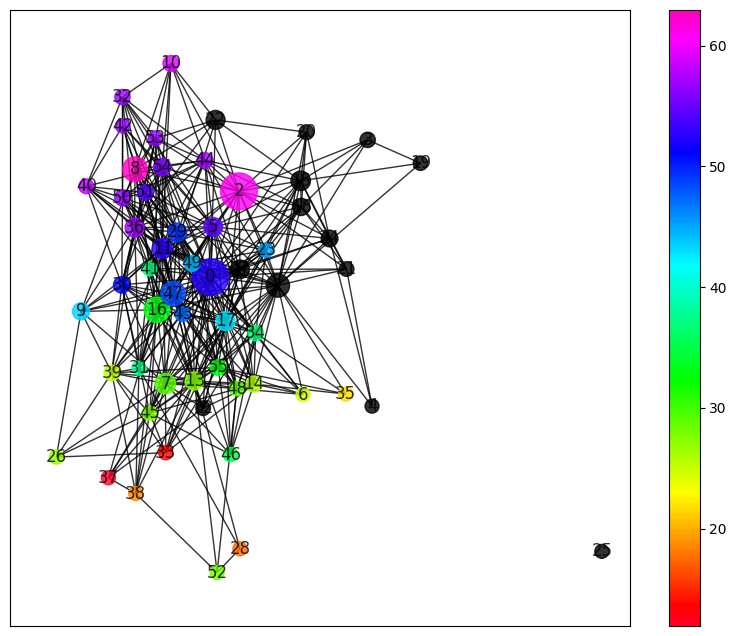

In [46]:
cdf = pd.DataFrame(df_unscaled_combined['UK_voteshare19'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='UK_voteshare19',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4, seed=4))
plt.savefig('Figures/combined_mainresult19_UK.png')

#### 2015

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


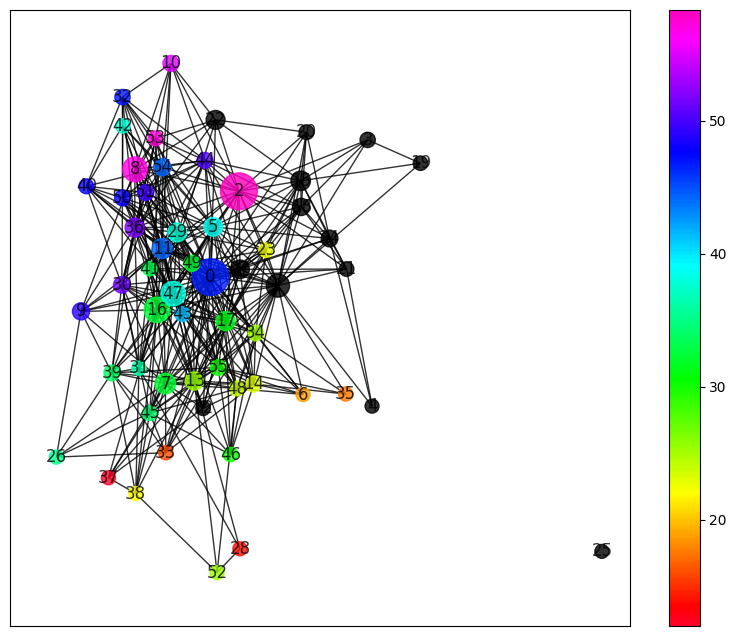

In [47]:
cdf = pd.DataFrame(df_unscaled_combined['UK_voteshare15'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='UK_voteshare15',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))
plt.savefig('Figures/combined_mainresult15_UK.png')

### US

#### 2016

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


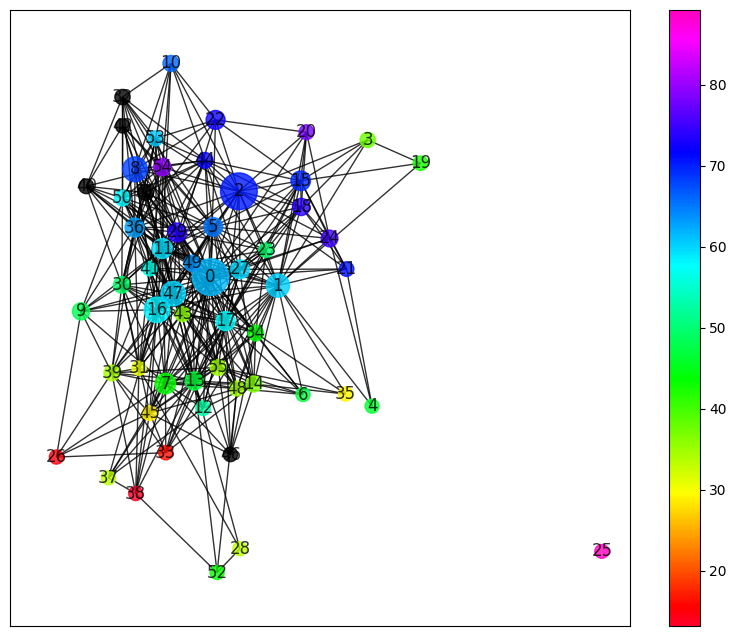

In [48]:
cdf = pd.DataFrame(df_unscaled_combined['US_voteshare16'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='US_voteshare16',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))
plt.savefig('Figures/combined_mainresult16_US.png')

#### 2012

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


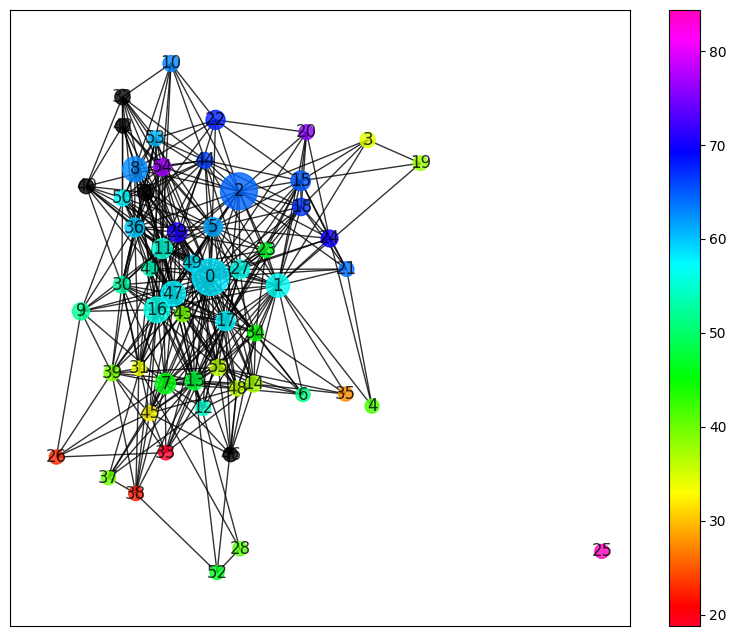

In [49]:
cdf = pd.DataFrame(df_unscaled_combined['US_voteshare12'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='US_voteshare12',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))
plt.savefig('Figures/combined_mainresult12_US.png')

### Gains

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


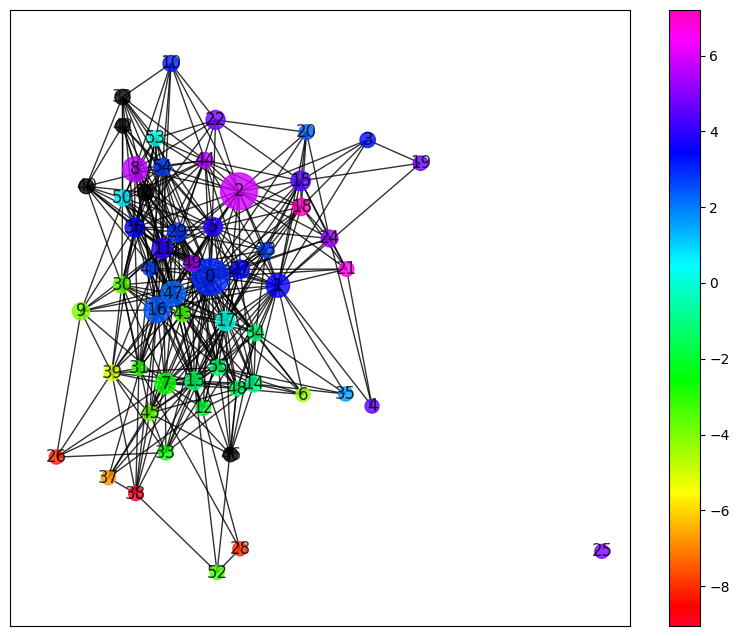

In [50]:
cdf = pd.DataFrame(df_unscaled_combined['US_votegains'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='US_votegains',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))
plt.savefig('Figures/combined_votegains_US.png')

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


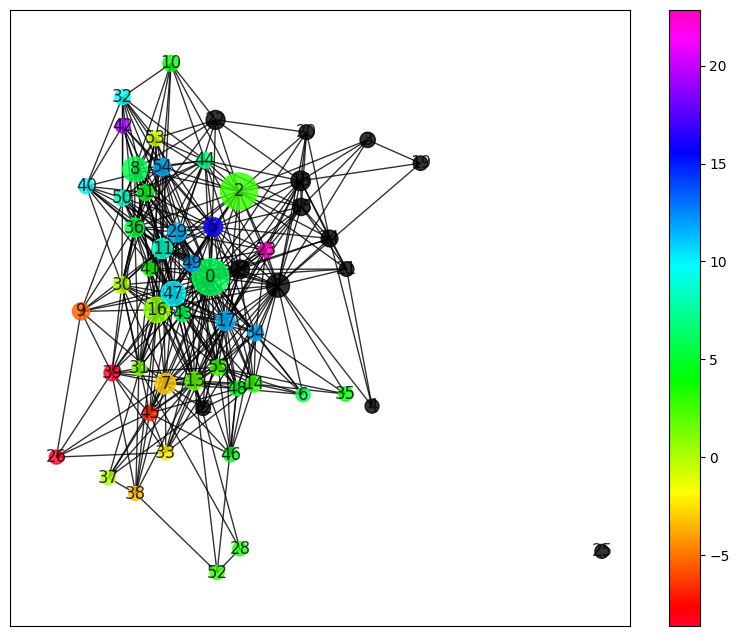

In [51]:
cdf = pd.DataFrame(df_unscaled_combined['UK_votegains'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='UK_votegains',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))
plt.savefig('Figures/combined_votegains_UK.png')

## Analysing the balls

In [52]:
pb1 = bm1.points_and_balls()
df_unscaled_combined['point'] = df_unscaled_combined.index
df_unscaled_combined = df_unscaled_combined.merge(pb1, on='point')

In [53]:
# List of states to analyze
states = ['IOWA', 'MICHIGAN', 'OHIO', 'PENNSYLVANIA', 'WISCONSIN', 'INDIANA', 'MISSOURI', 'WEST VIRGINIA','ILLINOIS']
states = ['MICHIGAN', 'PENNSYLVANIA', 'WISCONSIN','OHIO']
# Calculate the total occurrences of each unique value in the 'ball' column
total_ball_counts = df_unscaled_combined['ball'].value_counts()

# Filter the DataFrame to include only rows from the specified states
filtered_data = df_unscaled_combined[df_unscaled_combined['Area'].isin(states)]

# Calculate the occurrences of each unique value in the 'ball' column for the filtered data
filtered_ball_counts = filtered_data['ball'].value_counts()

# Compute the proportion of each ball that belongs to the specified states
ball_proportions = filtered_ball_counts / total_ball_counts

# Convert the proportions to a DataFrame for better display
ball_proportions_df = ball_proportions.to_frame(name='Proportion')

# Fill NaN values with 0 to indicate that the ball did not appear in the filtered data
ball_proportions_df.fillna(0, inplace=True)

print(ball_proportions.sort_values(ascending=False))


ball
16    0.179207
10    0.168421
0     0.127343
8     0.123123
47    0.112500
11    0.110063
2     0.107945
9     0.104938
39    0.097561
41    0.095238
21    0.090909
7     0.079096
36    0.070370
30    0.069231
13    0.060748
33    0.058824
22    0.053435
27    0.048583
20    0.045455
19    0.038462
12    0.031250
14    0.028302
53    0.021739
55    0.020619
17    0.018382
3     0.015385
44    0.011905
5     0.008032
18    0.006098
1     0.001821
52    0.000000
51    0.000000
50    0.000000
42    0.000000
49    0.000000
48    0.000000
4     0.000000
46    0.000000
45    0.000000
54    0.000000
43    0.000000
24    0.000000
40    0.000000
25    0.000000
6     0.000000
38    0.000000
37    0.000000
15    0.000000
35    0.000000
34    0.000000
32    0.000000
31    0.000000
29    0.000000
23    0.000000
26    0.000000
28    0.000000
Name: count, dtype: float64


In [54]:
data=df_unscaled_combined
uk_data = data[data['UK'] == 1]

# Create a DataFrame with only US points
us_data = data[data['UK'] == 0]

# Group by 'ball' and count the number of points for UK
uk_points = uk_data.groupby('ball').size().reset_index(name='UK_points')

# Group by 'ball' and count the number of points for US
us_points = us_data.groupby('ball').size().reset_index(name='US_points')

# Merge UK and US points into a single DataFrame
result = pd.merge(uk_points, us_points, on='ball', how='outer').fillna(0)

# Convert the counts to integers (in case of NaN)
result['UK_points'] = result['UK_points'].astype(int)
result['US_points'] = result['US_points'].astype(int)

# Print the result
print(result)

    ball  UK_points  US_points
0      0         51       1763
1      1          0        549
2      2          2       1823
3      3          0         65
4      4          0          4
5      5         20        229
6      6          1         11
7      7         31        323
8      8          1        665
9      9          4        158
10    10          3         92
11    11        113        205
12    12          0         32
13    13         15        199
14    14         11         95
15    15          0        298
16    16          5        726
17    17         18        254
18    18          0        164
19    19          0         26
20    20          0         44
21    21          0         33
22    22          0        262
23    23          1         31
24    24          0        138
25    25          0          1
26    26          3          7
27    27          0        247
28    28          3          3
29    29        263          1
30    30         82         48
31    31

In [72]:
df_US.describe()

ID      Under18       18to24       25to34       35to49  \
count   3113.000000  3113.000000  3113.000000  3113.000000  3113.000000   
mean   30613.240925    22.559621     9.009733    11.635657    18.003630   
std    15002.387117     3.422176     3.573923     2.247557     2.121659   
min     1001.000000     3.900000     0.700000     0.000000     4.900000   
25%    19033.000000    20.500000     7.300000    10.300000    16.700000   
50%    29203.000000    22.500000     8.200000    11.400000    18.100000   
75%    45091.000000    24.300000     9.500000    12.700000    19.200000   
max    56045.000000    40.300000    55.700000    26.900000    29.400000   

            50to64       Over65        White  Unemployment  Poor_fair_health  \
count  3113.000000  3113.000000  3113.000000   3113.000000       3113.000000   
mean     21.166078    17.623386    83.523482      6.229229         16.926052   
std       2.795050     4.452917    16.406925      2.233233          4.959300   
min       5.200000     3.900000    10.100000      1.188560          7.200000   
25%      19.600000    14.800000    75.800000      4.661487         13.000000   
50%      21.200000    17.300000    89.700000      6.019020         15.900000   
75%      22.700000    19.900000    96.100000      7.489074         20.000000   
max      44.800000    53.100000    99.500000     23.617721         41.700000   

       Vote_share_after  Vote_share_before        gains  No_qualifications  \
count       3113.000000        3113.000000  3113.000000        3113.000000   
mean          63.256875          59.571139     3.685737          14.523170   
std           15.674794          14.845118     5.672718           6.276654   
min            4.087474           7.193430   -37.618717           2.304688   
25%           54.456875          50.277338     0.661868           9.802272   
50%           66.316680          60.718247     3.668678          13.192461   
75%           74.902283          70.267197     7.235667          18.498531   
max           94.584838          95.862069    23.116316          47.053221   

            Degree  child_poverty        income        Urban      UK  
count  3113.000000    3113.000000   3113.000000  3113.000000  3113.0  
mean     19.013536      22.848121  28139.773209    36.256727     0.0  
std       8.190277      10.226886   5224.813939    33.772130     0.0  
min       2.857143       0.000000   5223.000000     0.000000     0.0  
25%      13.296948      15.500000  25128.000000     0.000000     0.0  
50%      17.118735      22.000000  27261.000000    33.958693     0.0  
75%      22.532300      28.600000  30763.000000    64.857186     0.0  
max      76.035156      70.900000  65122.000000   100.000000     0.0

In [71]:
pd.set_option('display.max_columns', None)
df_unscaled_combined[(df_unscaled_combined['ball']==44)&(df_unscaled_combined['UK']==0)].describe()

Under18     18to24     25to34     35to49     50to64     Over65  \
count  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000   
mean   20.178462   6.827692   9.144615  15.884615  24.018462  23.953846   
std     2.596301   1.423739   1.617196   1.731350   2.608873   4.101908   
min    11.500000   1.900000   4.500000  10.300000  19.800000  12.900000   
25%    18.300000   6.200000   8.300000  15.000000  22.300000  21.100000   
50%    20.200000   6.900000   9.300000  16.300000  23.600000  23.800000   
75%    22.100000   7.700000  10.300000  17.000000  25.100000  26.000000   
max    27.500000   9.700000  12.000000  19.300000  34.100000  35.800000   

           White  Unemployment  Poor_fair_health  Vote_share_after  \
count  65.000000     65.000000         65.000000         65.000000   
mean   90.444615      6.633570         19.093846         71.940682   
std     9.085686      1.838205          3.627925         10.831822   
min    64.100000      2.732919         11.800000         31.818182   
25%    86.600000      5.264969         17.000000         67.079347   
50%    93.000000      6.498754         18.900000         74.925962   
75%    97.600000      7.735882         21.700000         79.172611   
max    99.000000     11.043454         29.300000         86.936475   

       Vote_share_before      gains  No_qualifications     Degree  \
count          65.000000  65.000000          65.000000  65.000000   
mean           66.382696   5.557986          16.421819  15.981817   
std            11.755870   4.164382           4.058524   4.731758   
min            24.278715  -6.185122           6.722689   8.529505   
25%            61.017897   2.684398          13.564122  11.843109   
50%            67.039523   4.640141          16.346897  15.521247   
75%            73.277662   7.539467          19.188377  18.447269   
max            92.914980  15.695898          23.614064  29.907099   

       child_poverty        income      Urban    UK  UK_voteshare_19  \
count      65.000000     65.000000  65.000000  65.0              0.0   
mean       36.321538  23467.938462   4.377532   0.0              NaN   
std         6.304078   2870.370593   9.436379   0.0              NaN   
min        24.300000  17391.000000   0.000000   0.0              NaN   
25%        31.700000  21497.000000   0.000000   0.0              NaN   
50%        36.300000  23223.000000   0.000000   0.0              NaN   
75%        41.700000  25660.000000   0.000000   0.0              NaN   
max        53.300000  32670.000000  33.715669   0.0              NaN   

       US_voteshare_16  UK_voteshare_15  US_voteshare_12  US_votegains  \
count              0.0              0.0              0.0     65.000000   
mean               NaN              NaN              NaN      5.557986   
std                NaN              NaN              NaN      4.164382   
min                NaN              NaN              NaN     -6.185122   
25%                NaN              NaN              NaN      2.684398   
50%                NaN              NaN              NaN      4.640141   
75%                NaN              NaN              NaN      7.539467   
max                NaN              NaN              NaN     15.695898   

       UK_votegains  UK_voteshare19  US_voteshare16  UK_voteshare15  \
count           0.0             0.0       65.000000             0.0   
mean            NaN             NaN       71.940682             NaN   
std             NaN             NaN       10.831822             NaN   
min             NaN             NaN       31.818182             NaN   
25%             NaN             NaN       67.079347             NaN   
50%             NaN             NaN       74.925962             NaN   
75%             NaN             NaN       79.172611             NaN   
max             NaN             NaN       86.936475             NaN   

       US_voteshare12        point  ball  
count       65.000000    65.000000  65.0  
mean        66.382696  1494.538462  44

In [67]:
df_unscaled_combined[(df_unscaled_combined['ball']==14)&(df_unscaled_combined['UK']==0)].groupby('Area').size()

Area
ALABAMA            4
ARKANSAS           3
CALIFORNIA        13
FLORIDA            3
GEORGIA           15
ILLINOIS           1
INDIANA            2
KANSAS             1
LOUISIANA          8
MARYLAND           2
MICHIGAN           1
MISSISSIPPI        6
MISSOURI           1
NEVADA             1
NEW JERSEY         4
NEW MEXICO         1
NEW YORK           3
NORTH CAROLINA     4
PENNSYLVANIA       1
SOUTH CAROLINA     2
TENNESSEE          1
TEXAS              3
VIRGINIA          14
WISCONSIN          1
dtype: int64

In [58]:
# Filter the DataFrame based on conditions
filtered_df = df_unscaled_combined[(df_unscaled_combined['ball'] == 26) & (df_unscaled_combined['UK'] == 1)]

# Count occurrences of each unique area (state name)
area_counts = filtered_df['Area'].value_counts()

# Display the result
print(area_counts)

Area
London    3
Name: count, dtype: int64


In [59]:
# Group by 'ball' and check if both UK and US = 1 exist in any row within each group
balls_with_both = df_unscaled_combined.groupby('ball').filter(
    lambda x: (x['UK'].eq(1).any() and x['US'].eq(1).any())
)

# Get unique ball values that meet the condition
unique_balls_with_both = balls_with_both['ball'].unique()

# Print the unique balls
print("Unique ball values where there are rows with both UK and US equal to 1:")
print(unique_balls_with_both)

KeyError: 'US'

## Appendix

In [ ]:
df_unscaled_combined.columns

Index(['ID', 'Name', 'Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'White', 'Unemployment', 'Poor_fair_health', 'Vote share',
       'No_qualifications', 'Degree', 'child_poverty', 'income', 'Urban', 'US',
       'UK', 'point', 'ball', 'UK_voteshare', 'US_voteshare',
       'UK_voteshare_avg_uk', 'US_voteshare_avg_us'],
      dtype='object')

In [ ]:
bmx1=df_combined[['Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'White', 'Unemployment', 'Poor_fair_health', 'No_qualifications', 'Degree', 'child_poverty', 'income','Urban']]
columns=['Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'White', 'Unemployment', 'Poor_fair_health', 'No_qualifications', 'Degree', 'child_poverty', 'income','Urban']

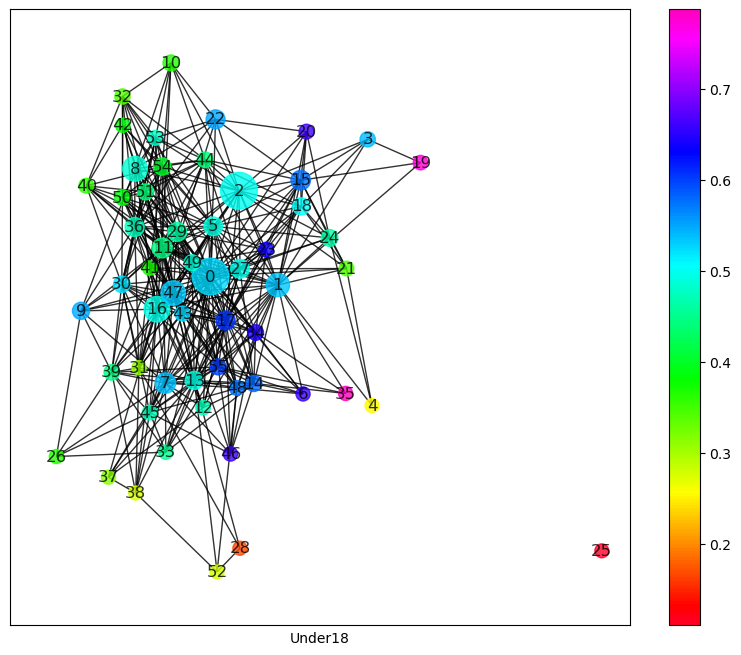

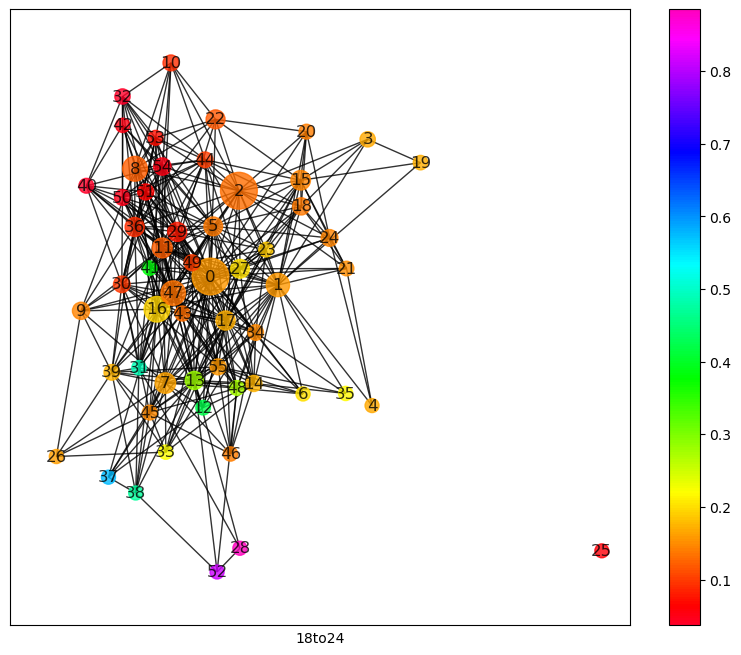

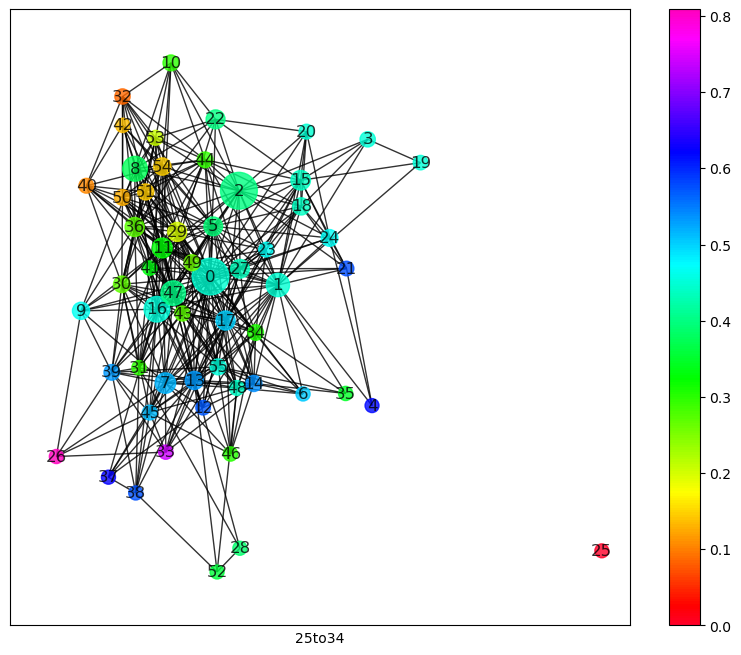

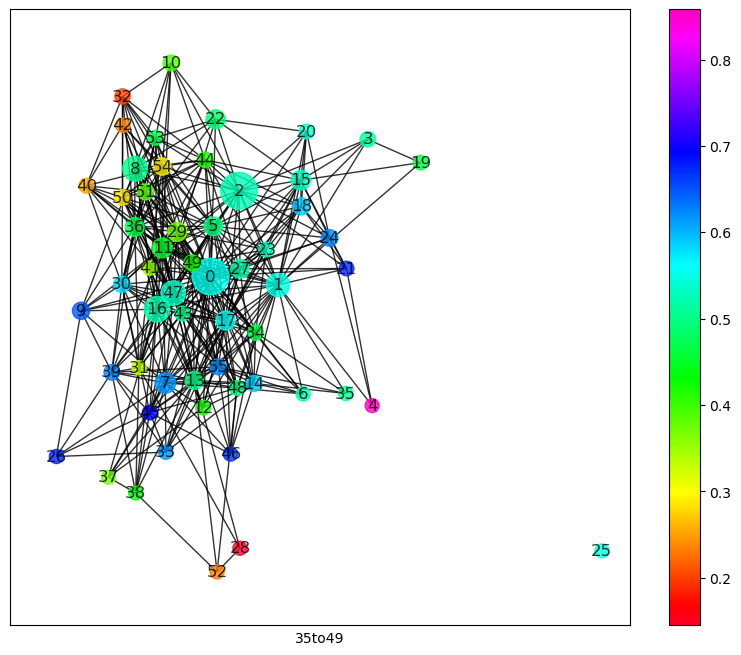

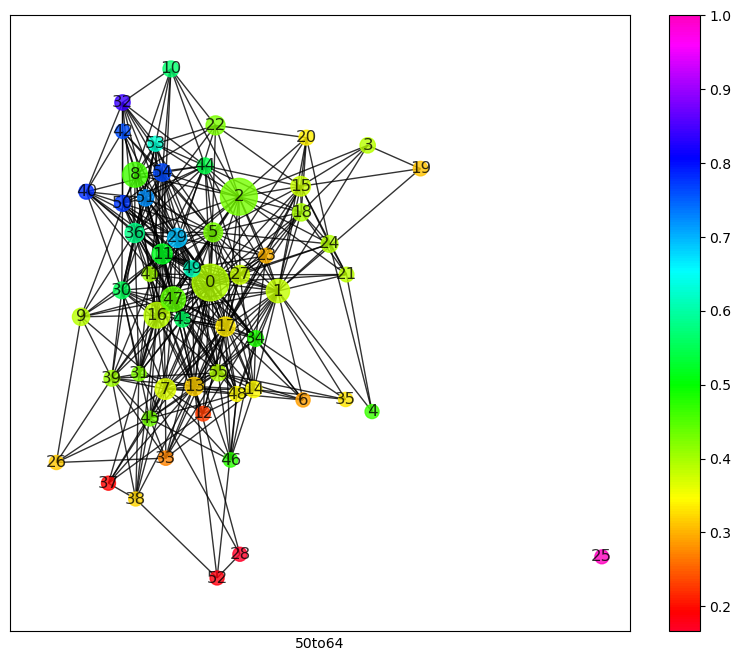

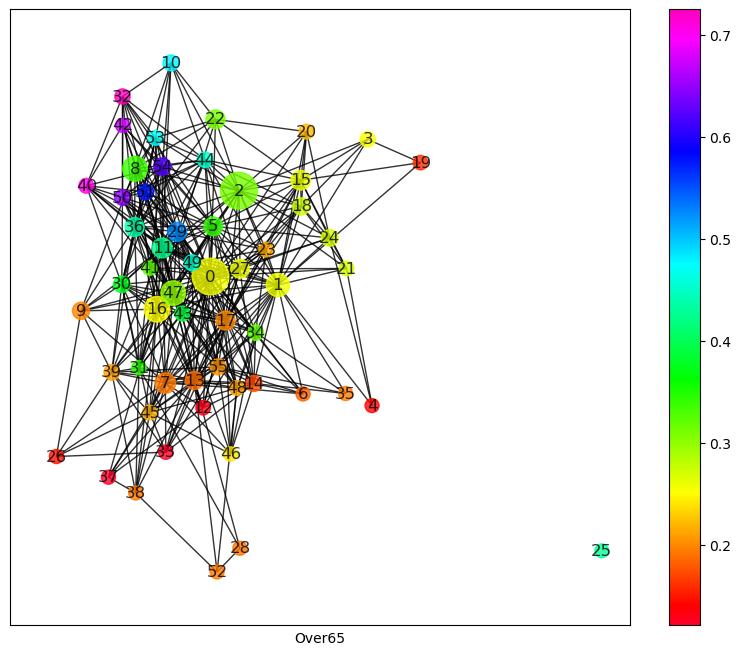

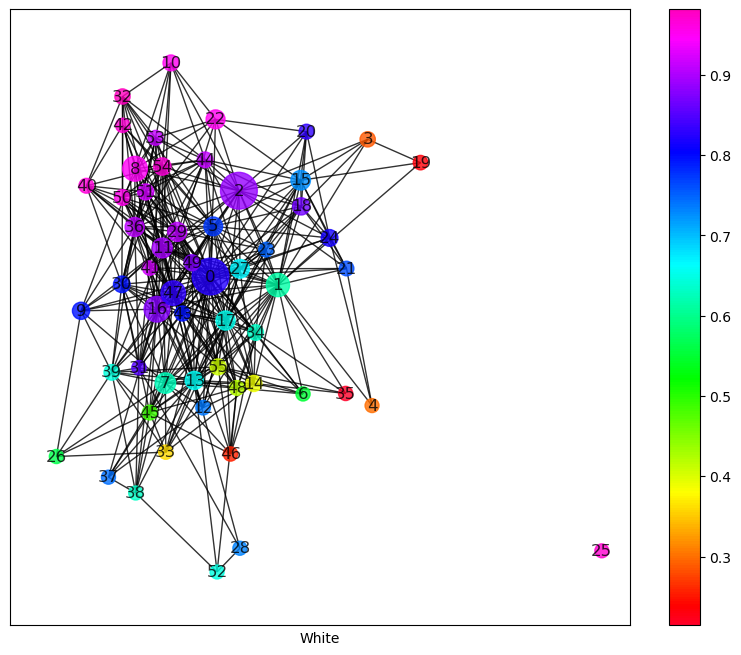

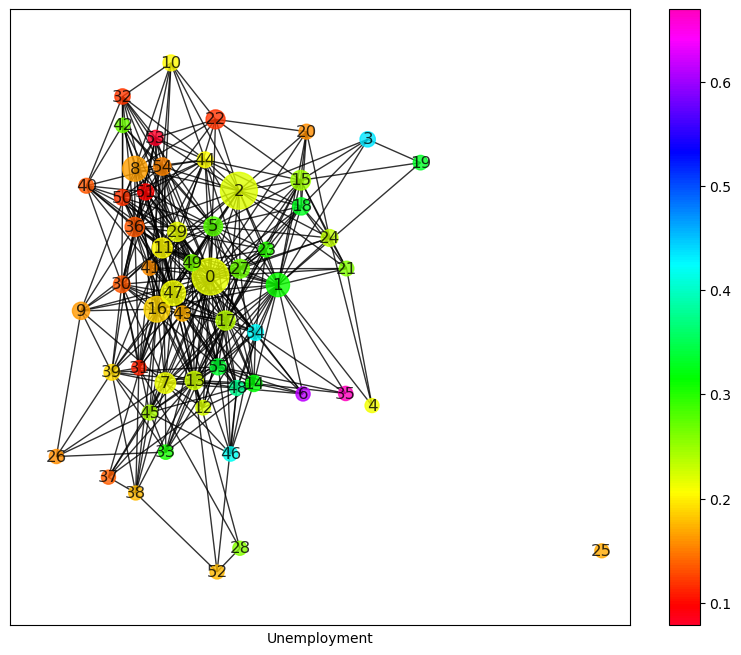

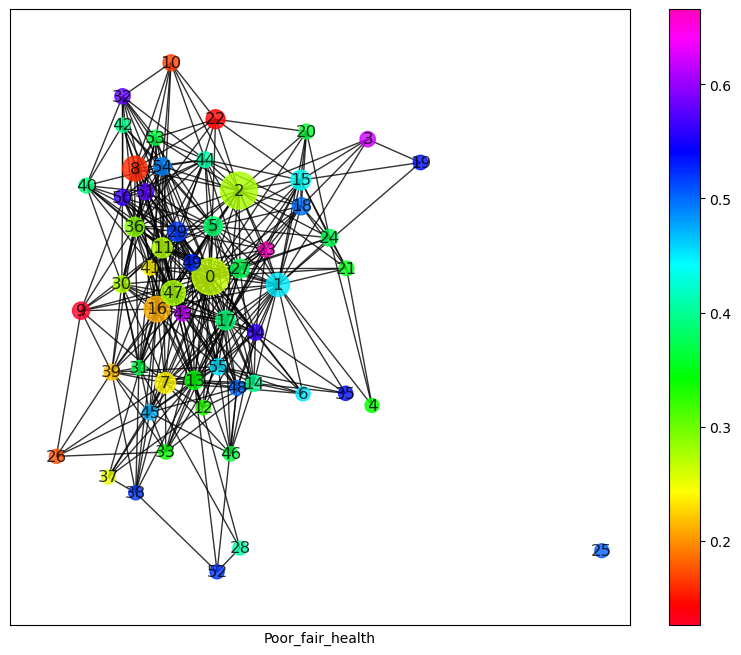

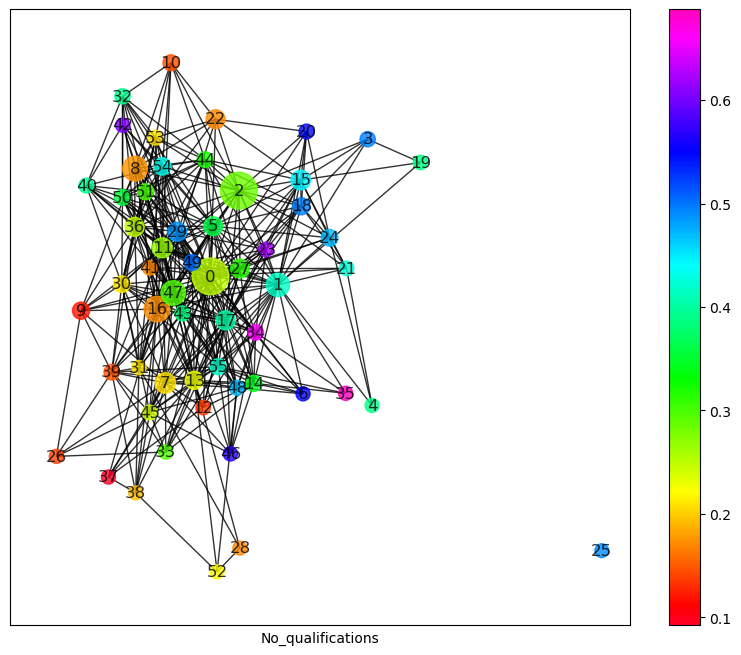

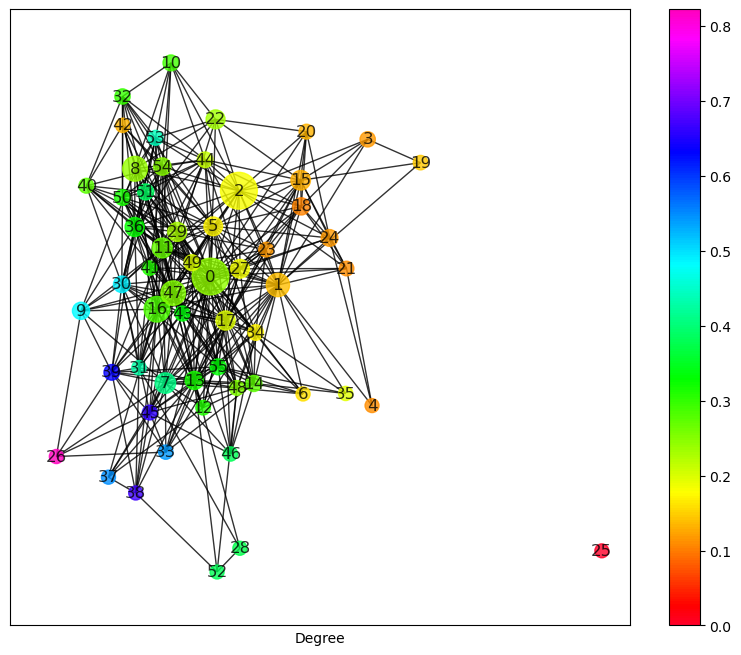

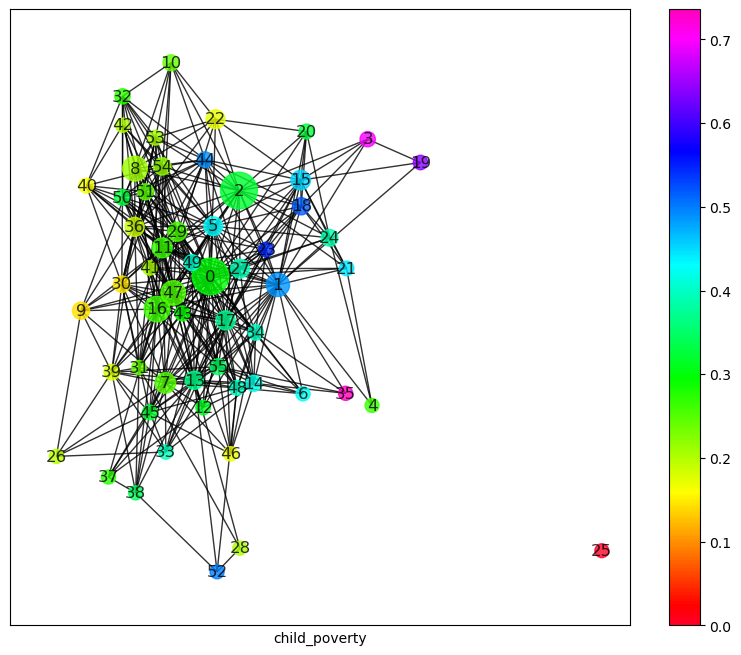

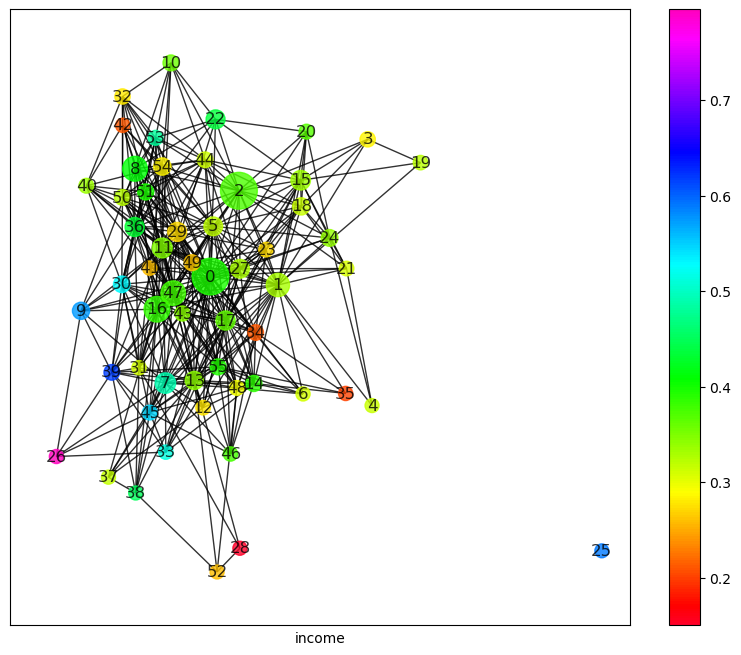

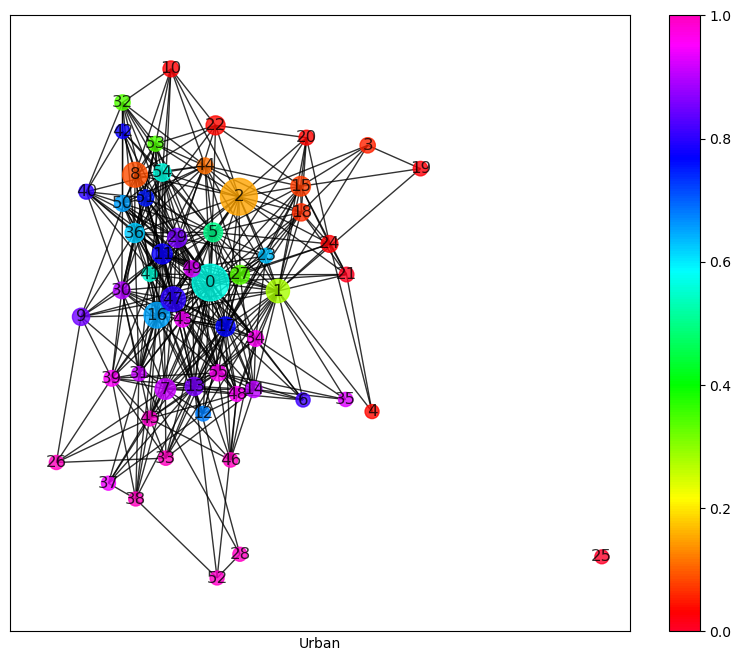

In [ ]:
for col in columns:
    cdf = pd.DataFrame(df_combined[col])
    bm1=pbm.BallMapper(X=bmx1, eps=0.64,coloring_df=cdf)
    hsvp = cm.get_cmap("gist_rainbow")
    plt.figure(figsize=(10, 8))
    bm1.draw_networkx(coloring_variable=col,color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))
    plt.xlabel(col)
    plt.show() 